<style>
.wzor {
  /* width: auto; */
  /* padding: auto; */
  border: 0.5rem solid gray;
  /* margin: 0; */
  background-color: lightgray;
}
</style>


# Modele analizy danych

Tomasz Rodak

---

## Wykład V

ISLP, $\S$ 2.2.3

---

## Spis treści

1. Klasyfikacja
    - Klasyfikator Bayesa
    - K najbliższych sąsiadów
    - Przykład

## Literatura
   1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor,
      J. (2023). An Introduction to Statistical Learning: With
      Applications in Python.
      
      [ISLP](https://www.statlearning.com/)
   
   2. Bishop, C. M., & Nasrabadi, N. M. (2006). Pattern recognition and
      machine learning (Vol. 4, No. 4, p. 738). New York: springer. 
   
      [PRML](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/)
   
   3. Kroese, D. P., Botev, Z., Taimre, T., & Vaisman, R. (2019). Data
      science and machine learning: mathematical and statistical
      methods. CRC Press.
   
      [https://people.smp.uq.edu.au/DirkKroese/DSML/](https://people.smp.uq.edu.au/DirkKroese/DSML/)
   
   4. Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman,
      J. H. (2009). The elements of statistical learning: data mining,
      inference, and prediction (Vol. 2, pp. 1-758). New York:
      springer.
   
      [https://hastie.su.domains/ElemStatLearn/](https://hastie.su.domains/ElemStatLearn/)
   
   5. Murphy, K. P. (2022). Probabilistic machine learning: an
      introduction. MIT press.
   
      [https://probml.github.io/pml-book/book1.html](https://probml.github.io/pml-book/book1.html)
   
   6. Murphy, K. P. (2023). Probabilistic machine learning: Advanced
      topics. MIT press.
   
      [https://probml.github.io/pml-book/book2.html](https://probml.github.io/pml-book/book2.html)
   
   7. Bishop, C. M., & Bishop, H (2024). Deep learning. Springer.
   
      [https://www.bishopbook.com/](https://www.bishopbook.com/)
   
   8. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
   
      [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 1. Klasyfikacja

### 1.1 Klasyfikator Bayesa

Klasyfikacja to problem w nadzorowanym uczeniu maszynowym, w którym celem jest przypisanie obiektu, reprezentowanego przez punkt $x\in \mathbb{R}^p$, do jednej ze (skończenie wielu) klas.

Niech 

\begin{equation*}
f\colon \mathbb{R}^p \to \{\mathcal{C}_1, \mathcal{C}_2, \dots, \mathcal{C}_K\}
\end{equation*}

oznacza funkcję przypisującą obiektowi $x$ etykietę klasy $\mathcal{C}_k$. Funkcję $f$ nazywamy **klasyfikatorem** (*classifier*) albo **funkcją decyzyjną** (*decision function*). Jeśli $\mathcal{T} = \{\,(x_i, y_i), i=1,\dots,n\,\}$ jest zbiorem punktów wejściowych wraz z odpowiadającymi im etykietami klas, to dla tego zbioru  możemy wyznaczyć **błąd predykcji** klasyfikatora $f$ na zbiorze $\mathcal{T}$ (*misclassification error*) jako odsetek błędnie sklasyfikowanych punktów. Formalnie, błąd predykcji definiujemy jako:
\begin{equation*}
\frac{1}{n} \sum_{i=1}^n I(y_i \neq f(x_i))=1-\frac{1}{n} \sum_{i=1}^n I(y_i = f(x_i)),
\end{equation*}
gdzie $I(\cdot)$ to funkcja wskaźnikowa:
\begin{equation*}
I(a\neq b) = \begin{cases}
1 & \text{jeśli } a\neq b, \\
0 & \text{jeśli } a= b,
\end{cases}
\end{equation*}
oraz $I(a=b)=1 - I(a\neq b)$.

Od roli zbioru $\mathcal{T}$ zależy, jak interpretujemy powyższy błąd predykcji:
- Jeśli $\mathcal{T}$ jest zbiorem treningowym, czyli jeśli zbiór ten był użyty do wyznaczenia funkcji $f$, to powyższy błąd predykcji nazywamy **błędem treningowym** (*training error*).
- Jeśli $\mathcal{T}$ jest zbiorem testowym/walidacyjnym, czyli nie był użyty do uczenia funkcji $f$, to powyższy błąd predykcji nazywamy **błędem testowym** (*test error*).

Z punktu widzenia budowy modelu wygląda to następująco. Niech $(X, Y)$ będzie elementem losowym generującym dane. Zakładamy zatem, że $X=(X_1, X_2, \dots, X_p)$ to wektor zmiennych losowych opisujących obiekt, a $Y$ to zmienna losowa przyjmująca wartości w zbiorze etykiet klas $\{\mathcal{C}_1, \mathcal{C}_2, \dots, \mathcal{C}_K\}$. Interesuje nas wówczas **oczekiwany błąd predykcji** (*expected prediction error*) klasyfikatora $f$:

\begin{equation*}
\operatorname{EPE}(f) := \mathbb{E}_{(X, Y)}(I(Y \neq f(X)))=P(Y \neq f(X)),
\end{equation*}

gdzie wartość oczekiwana jest brana względem łącznego rozkładu wektora $(X, Y)$. Zdefiniowany wyżej błąd predykcji na zbiorze testowym, czyli błąd testowy, jest właśnie przybliżeniem $\operatorname{EPE}(f)$.

Intuicyjnie jest jasne, że chcemy znaleźć taki klasyfikator $f$, dla którego $\operatorname{EPE}(f)$ jest jak najmniejsze. 
Okazuje się, taki klasyfikator istnieje i nazywa się go **klasyfikatorem Bayesa** (*Bayes classifier*). Definiuje się go wzorem:

\begin{equation*}
f^*(x) = \operatorname{argmax}_{c\in \{\mathcal{C}_1, \mathcal{C}_2, \dots, \mathcal{C}_K\}} P(Y=c|X=x).
\end{equation*}

Inaczej mówiąc, klasyfikator Bayesa przypisuje obiektowi $x$ etykietę tej klasy, dla której prawdopodobieństwo warunkowe $P(Y=c|X=x)$ jest największe. Idea ta jest intuicyjna: przypisujemy obiektowi $x$ tę klasę, która jest najbardziej prawdopodobna, biorąc pod uwagę wartość cech $x$. Jak powiedzieliśmy wyżej klasyfikator Bayesa jest najlepszy w tym sensie, że minimalizuje oczekiwany błąd predykcji $\operatorname{EPE}(f)$: dla dowolnego innego klasyfikatora $f$ zachodzi nierówność

\begin{equation*}
\operatorname{EPE}(f^*) \leq \operatorname{EPE}(f).
\end{equation*}

Wielkość $\operatorname{EPE}(f^*)$ nazywamy **błędem Bayesa** (*Bayes error*). Jest to najniższy możliwy błąd predykcji, jaki można osiągnąć dla danego problemu klasyfikacji. Błąd Bayesa jest odpowiednikiem błędu losowego $\varepsilon$ w modelu regresji $Y = f(X) + \epsilon$.

Okazuje się, że klasyfikator Bayesa minimalizuje nie tylko oczekiwany błąd predykcji $\operatorname{EPE}(f)$, ale również **błąd predykcji w punkcie $x$** (*prediction error at $x$*):

\begin{equation*}
\mathbb{E}(I(Y \neq f(X))|X=x) = P(Y \neq f(X)|X=x).
\end{equation*}

Akurat ten fakt jest łatwy do udowodnienia. Założmy dla uproszczenia, że mamy do czynienia z problemem klasyfikacji binarnej $Y\in \{\mathcal{C}_1, \mathcal{C}_2\}$ i że $f$ jest dowolnym klasyfikatorem. Wtedy:

\begin{align*}
\mathbb{E}(I(Y \neq f(X))|X=x) &= P(Y \neq f(X)|X=x) \\
&= P(Y = \mathcal{C}_1, f(X) \neq \mathcal{C}_1|X=x) + P(Y = \mathcal{C}_2, f(X) \neq \mathcal{C}_2|X=x) \\
&= P(Y = \mathcal{C}_1|X=x) I(f(x) \neq \mathcal{C}_1) + P(Y = \mathcal{C}_2|X=x) I(f(x) \neq \mathcal{C}_2).
\end{align*}

Zatem, z określenia klasyfikatora Bayesa $f^*$ mamy:

\begin{equation*}
\mathbb{E}(I(Y \neq f^*(X))|X=x) = \\
\begin{cases}
P(Y = \mathcal{C}_2|X=x), & \text{jeśli } P(Y = \mathcal{C}_2|X=x) <= P(Y = \mathcal{C}_1|X=x), \\
P(Y = \mathcal{C}_1|X=x) & \text{jeśli } P(Y = \mathcal{C}_1|X=x) < P(Y = \mathcal{C}_2|X=x).
\end{cases}
\end{equation*}

Podobnie, jeśli mamy do czynienia z problemem klasyfikacji wieloklasowej, to:

\begin{equation*}
\mathbb{E}(I(Y \neq f(X))|X=x) = \sum_{k=1}^K P(Y = \mathcal{C}_k|X=x) I(f(x) \neq \mathcal{C}_k)
\end{equation*}
i z definicji klasyfikatora Bayesa $f^*$ mamy:

\begin{equation*}
\mathbb{E}(I(Y \neq f^*(X))|X=x) = 1 - \max_{k=1,\dots,K} P(Y = \mathcal{C}_k|X=x).
\end{equation*}

Można wykazać, że klasyfikator minimalizujący błąd predykcji w punkcie $x$ również minimalizuje oczekiwany błąd predykcji $\operatorname{EPE}(f)$. Zatem klasyfikator Bayesa minimalizuje oba te błędy jednocześnie.

Fakt istnienia klasyfikatora Bayesa jest bardzo ważny z punktu widzenia budowy modeli klasyfikacyjnych. Pokazuje on, że istnieje teoretycznie najlepszy klasyfikator, do którego powinniśmy dążyć. Niestety, w praktyce nie znamy rozkładu warunkowego $P(Y\mid X=x)$, dlatego bezpośrednia konstrukcja klasyfikatora Bayesa jest niemożliwa. Zamiast tego, w praktyce stosujemy różne metody przybliżania klasyfikatora Bayesa na podstawie dostępnych danych treningowych. Jedną z takich metod jest algorytm K najbliższych sąsiadów.

### 1.2 $K$ najbliższych sąsiadów

Metoda $K$ najbliższych sąsiadów (ang. *$K$ nearest neighbors*, $K$-NN) jest jedną z najprostszych metod klasyfikacji, polegającą na przybliżeniu rozkładu $P(Y|X=x)$ za pomocą $K$ najbliższych obiektów treningowych $x_i$ do $x$. Metoda ta wymaga ustalenia metryki $d(x,x')$ na przestrzeni cech. 

Ustalmy dodatnią liczbę całkowitą $K$. Dla ustalonego obiektu $x$ znajdujemy zbiór $\mathcal{N}_x$ $K$ najbliższych obiektów treningowych $x_i$ do $x$ (w sensie metryki $d$). Prawdobodobieństwo $P(Y=\mathcal{C}_k|X=x)$ estymujemy jako frakcję obiektów $x_i$ w $\mathcal{N}_x$, dla których $y_i=\mathcal{C}_k$:

\begin{equation*}
P(Y=\mathcal{C}_k|X=x) = \frac{1}{K} \sum_{x_i \in \mathcal{N}_x} I(y_i=\mathcal{C}_k).
\end{equation*}

Dla uproszczenia notacji prawdobodobieństwo to oznaczamy przez $P$, choć bardziej ściśle byłoby pisać $\hat{P}$, gdyż jest to estymator prawdopodobieństwa.

Gdy mamy już rozkłady $P(Y|X=x)$, to klasyfikator definiujemy jako klasyfikator Bayesa zadany przez te rozkłady: obiektowi $x$ przypisujemy tę etykietę $k$, która ma największe prawdopodobieństwo w rozkładzie $P(Y=\mathcal{C}_k|X=x)$.

### 1.3 Przykład

Na podstawie ESL, rozdział 2.3.3.

In [3]:
np.random.seed(0)
centers_blue = np.random.normal(size=(10,  2))
centers_orange = np.random.normal(size=(10, 2))
sd = (1/5)**.5
N_train, N_test = 200, 10_000

X_train, X_test = np.zeros((N_train, 2)), np.zeros((N_test, 2))
y_train = np.stack([np.zeros(N_train // 2), np.ones(N_train // 2)]).flatten()
y_test = np.stack([np.zeros(N_test // 2), np.ones(N_test // 2)]).flatten()
for i in range(N_train // 2):
    center_blue = centers_blue[np.random.choice(10)]
    center_orange = centers_orange[np.random.choice(10)]
    X_train[i] = center_blue + np.random.normal(scale=sd, size=2)
    X_train[i + N_train // 2] = center_orange + np.random.normal(scale=sd, size=2)
for i in range(N_test // 2):
    center_blue = centers_blue[np.random.choice(10)]
    center_orange = centers_orange[np.random.choice(10)]
    X_test[i] = center_blue + np.random.normal(scale=sd, size=2)
    X_test[i + N_test // 2] = center_orange + np.random.normal(scale=sd, size=2)

<Axes: >

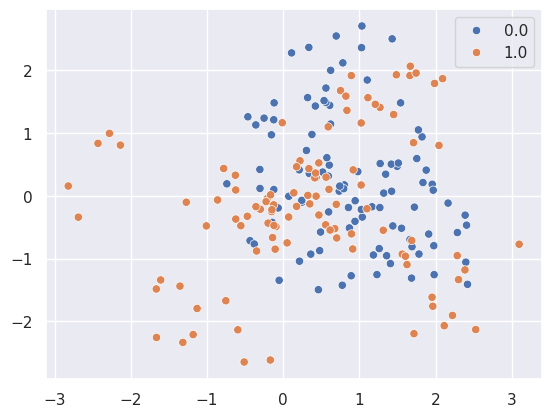

In [4]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)

In [5]:
n_neighbors = 10
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [6]:
from sklearn.metrics import confusion_matrix

y_train_pred = clf.predict(X_train)
# Macierz pomyłek na zbiorze treningowym
confusion_matrix(y_train, y_train_pred)

array([[82, 18],
       [25, 75]])

In [7]:
# Dokładność (accuracy) na zbiorze treningowym
clf.score(X_train, y_train)

0.785

In [8]:
y_test_pred = clf.predict(X_test)
# Macierz pomyłek na zbiorze testowym
confusion_matrix(y_test, y_test_pred)

array([[3771, 1229],
       [1575, 3425]])

In [9]:
# Dokładność na zbiorze testowym
clf.score(X_test, y_test)

0.7196

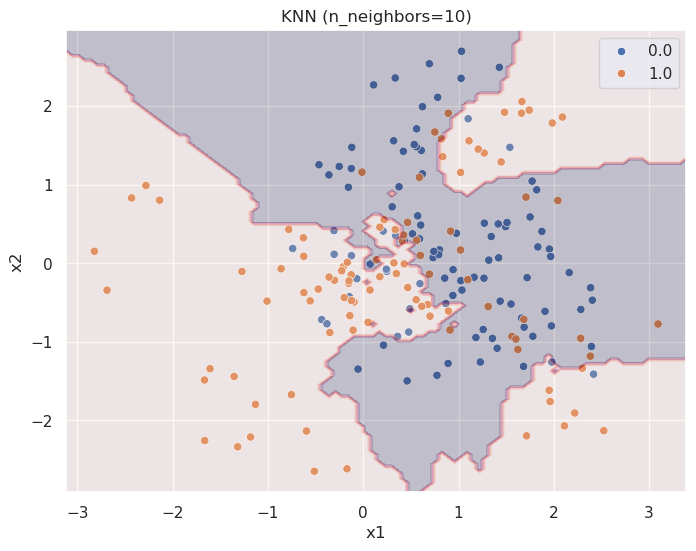

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, ax=ax)
ax.set_title(f"KNN (n_neighbors={n_neighbors})")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
# clf decision boundary
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.2);

In [11]:
train_errors = []
test_errors = []
neighbour_values = np.array([1, 4, 8, 15, 30, 50, 75, 100, 150, 200])
# neighbour_values = np.arange(1, 201, 10)
complexity = (200 / neighbour_values).astype(int)

for n_neighbors in neighbour_values:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_errors.append(1 - clf.score(X_train, y_train))
    test_errors.append(1 - clf.score(X_test, y_test))

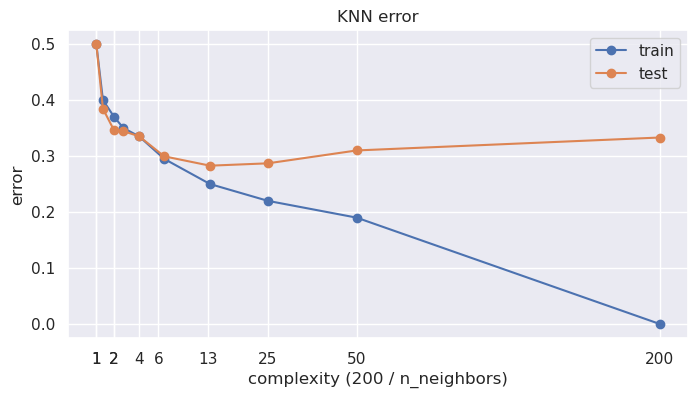

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(200 / neighbour_values, train_errors, label="train", marker="o")
ax.plot(200 / neighbour_values, test_errors, label="test", marker="o")
ax.set_xscale('function', functions=[lambda x: x**.5, lambda x: x**2])
ax.set_xlabel("complexity (200 / n_neighbors)")
ax.set_ylabel("error")
ax.set_title("KNN error")
ax.set_xticks(complexity)
# ax.set_xlim(0, 120)
ax.legend();
